In [1]:
## the script version "test_2line.py" is generated by exporting this notebook via file -> export as -> executable script.
## Do not directly edit that version!

# Test the two-line CLEDB inversion on synthetic data.

In [1]:
## Inversion Constants and control parameter imports.
## symbolic links pointing to the root directory containing the files are used. Pythondoes not allow relative upstream references anymore
import constants as consts
import ctrlparams
params=ctrlparams.ctrlparams()    ##Initialize and use a shorter label

## Needed modules
import pickle                ## CLE synthetic observation data cube is saved in the pickle format.
import importlib             ## reloads imports (python default settings will not reload small changes).
import numpy as np           ## Defines variables to store/load headers

from numba.typed import List ## Most numba functions are loaded by the CLEDB modules; non-reflected lists are needed to create a list of 2 observation arrays

### 1. Import the Fe XIII 1074 and 1079 nm synthetic CLE/MURAM or observed CoMP data

#### 1.a CLE 3dipole along LOS simulation example

In [2]:
## observations of a 3 dipole coronal structure of a Fe XIII combined observation
## sobs1-3 are the independent dipoles
## sobsa is the combined 3 dipole output
## waveA and waveB are the wavelength arrays for the two Fe XIII lines

# with open('obsstokes_3dipole_hires_fullspectra.pkl','rb') as f:
#     sobs1,sobs2,sobs3,sobsa,waveA,waveB = pickle.load(f)
# ### reversing of the wavelength range. THIS IS NEEDED! CLE writes frequency-wise, so wavelengths are reversed in the original datacubes!!!!!!
# sobsa=sobsa[:,:,::-1,:]

# ## A fake minimal header for CLE
# ## This assumes the reference pixel is in the left bottom of the array; the values are in solar coordinates at crpixn in r_sun. The wavelength raferences (vacuum), ranges and spectral resolutions are unique. See CLE outfiles and grid.dat.
# head_in =  [np.array((0, 0, np.int32(sobsa.shape[2]/2)-1,\
#                      -0.75, 0.8, 1074.62686-0.0124,\
#                      (0.75-(-0.75))/sobsa.shape[0], (1.5-0.8)/sobsa.shape[1], 0.0247,"CLE-SIM"),\
#                     dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
#                               ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
#                               ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume','U7')]).view(np.recarray),\
#             np.array((0, 0, np.int32(sobsa.shape[2]/2)-1,\
#                      -0.75, 0.8, 1079.78047-0.0124,\
#                      (0.75-(-0.75))/sobsa.shape[0], (1.5-0.8)/sobsa.shape[1], 0.0249,"CLE-SIM"),\
#                     dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
#                               ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
#                               ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume', 'U7')]).view(np.recarray)  ]

#waveA=waveA[::-1]         ##the wave arrays are not needed by the inversion. the information is reconstructed from keywords
#waveB=waveB[::-1]

#### 1.b CLE sheets along LOS example loading

In [3]:
## observations of sheetlos coronal structure of a Fe XIII combined observation
## sobsa is the combined 5 dipole output
## waveA and waveB are the wavelength arrays for the two Fe XIII lines

# with open('obsstokes_sheetslos_hires_fullspectra.pkl','rb') as f:
#    sobsa,waveA,waveB = pickle.load(f)
### reversing of the wavelength range. THIS IS NEEDED! CLE writes frequency-wise, so wavelengths are reversed in the original datacubes!!!!!!
# sobsa=sobsa[:,:,::-1,:]

# ## A fake minimal header for CLE
# ## This assumes the reference pixel is in the left bottom of the array; the values are in solar coordinates at crpixn in r_sun. The wavelength raferences (vacuum), ranges and spectral resolutions are unique. See CLE outfiles and grid.dat.
# head_in =  TBD


# waveA=waveA[::-1]         ##the wave arrays are not needed by the inversion. the information is reconstructed from keywords
# waveB=waveB[::-1]

## not yet included as test data. Coming soon!

#### 1.c MURAM data example loading

In [4]:
## load the fake observation muram data.
## FE XIII 1074+1079

with open('obsstokes_avg_muram3.pkl','rb') as f:
    sobsa = pickle.load(f)
sobsa=sobsa[0]

## A fake minimal header for MURAM
## This assumes the reference pixel is in the left bottom of the array; the values are in solar coordinates at crpixn in r_sun (from muram xvec and yvec arrays). The wavelength raferences (vacuum), ranges and spectral resolutions are unique (muram wvvec1 and wvvce2 arrays).
head_in =  [np.array((0, 0, 0,\
                     -0.071, 0.989, 1074.257137,\
                     0.0001379,  0.0000689, 0.0071641,"MUR-SIM" ),\
                    dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
                              ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
                              ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume','U7')]).view(np.recarray),\
            np.array((0, 0, 0,\
                    -0.071, 0.989, 1079.420513,\
                     0.0001379,  0.0000689, 0.0071985,"MUR-SIM" ),\
                    dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
                              ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
                              ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume','U7')]).view(np.recarray)  ]

## muram data too big to include as test data!!!!

#### 1.d CoMP data example loading (IQUD required. No stokes V!)

In [5]:
# ## load a sample MLSO CoMP observation.
# ## FE XIII 1074+1079
# ## We will be using the 20120327 continuum corrected CoMP datacube from http://download.hao.ucar.edu/d5/mlso/pub/comp-continuum-correction/
# ## We will work under the assumption of using MLSO lev 2 data that are already wavelength integrated.

# ## Practically, in this test case both iqud and integrated parameters need to be set to true.
# if params.integrated == True:
#     with open('obsstokes_CoMP_integrated_20120327.pkl','rb') as f:
#         c1074_iqu,c1079_iqu = pickle.load(f)                         ## These are dictionaries. included keys are queried by c1074_iqu.keys()

#     head_in = [c1074_iqu['index1'],c1079_iqu['index1']]

#     sobsa = np.zeros((head_in[0].naxis1[0],head_in[0].naxis2[0],4),dtype=np.float32) ## sobsa will not have a wavelength point dimension in this case
#     sobsb = np.zeros((head_in[0].naxis1[0],head_in[0].naxis2[0],4),dtype=np.float32)

#     ## This examples uses frames "3" in the c1074_iqu cube and "2"in the c1079_iqu cube which are close temporally for the main matching
# #     sobsa[:,:,0] = c1074_iqu['cube_ii'][3,:,:]                       ## Uses frame 3 - '2012-03-27T18:01:21'
# #     sobsa[:,:,1] = c1074_iqu['cube_q' ][3,:,:]
# #     sobsa[:,:,2] = c1074_iqu['cube_u' ][3,:,:]

# #     sobsb[:,:,0] = c1079_iqu['cube_ii'][2,:,:]                       ## Uses frame 2 - '2012-03-27T18:05:32'
# #     sobsb[:,:,1] = c1079_iqu['cube_q' ][2,:,:]
# #     sobsb[:,:,2] = c1079_iqu['cube_u' ][2,:,:]

#     ## If future uCoMP or COSMO data can retrieve Stokes V, an IQUV inversion might become feasible
#     ## Otherwise just leave the Stokes V dimension set to 0
#     # if params.iqud != True:
#     #     sobsa[:,:,3] = c1074_iqu['cube_v'][3,:,:]                    ##cube_v does not exist in this test dataset
#     #     sobsb[:,:,3] = c1079_iqu['cube_v'][3,:,:]

### 1.e Doppler data loading

In [6]:
# ## Loading of the doppler data. THE ELIF BRANCH IS REQUIRED for Numba compatibility regardless of type of inversion.
# ## The Numba non-python cledb_prepinv implmentation needs static inputs, that forces including sobs_dopp for hypotethically running iqud setups.
# ## In the IQUV case, the array is just set to empty and will not be used downstream.

if params.integrated == True and params.iqud == True:
    with open('obsdopp_CoMP_IQUD_bpos_20120327.pkl','rb') as f:
        sobs_dopp = np.nan_to_num(pickle.load(f),nan=0)    ## lots of voxels were deemed unmeasurable and are stored as nan. Convert these to 0 for simplicity.  
elif params.iqud == False: 
    sobs_dopp = np.empty((sobsa.shape[0],sobsa.shape[1],4),dtype=np.float32)

# ## These quantities are computed using the methods and public code presented in Yang et. al, 2020
# ## The array dimensions are:
# ## 0 - Magnetic field strength via wave plasma speed (see Paraschiv 2023 or Yang et. al, 2020)
# ## The quantity might alternatively be assumed as correspondent correspondent to B*cos(Theta_B). The applicability of this statement is not yet proved!!
# ## 1 - Wave propagation angle (wpa) resulting from the doppler oscilation analysis. ## - np.pi/2 applied, see below
# ##     (wpa): If using the IDL scripts to compute these quantities, deduct pi/2 to have the same range as 0.5arctan(u/q) which is (-pi/2,pi/2).
# ## 2 - Not currently used - Magnetic azimuth as derived from the ratio of the UQ linear polarization components (Phi_B; also computed in this setup). sobs_dopp[2]=sobs_dopp[0]*np.cos(Phi_B)
# ## 3 - Not currently used - Magnetic azimuth as derived from the wave phase angle(wpa) of propagating doppler waves.                                  sobs_dopp[3]=sobs_dopp[0]*np.cos(sobs_dopp[1])


### 2. Test the CLEDB_PREPINV module with synthetic data. 

##### Remember to set your personal options and database paths in the ctrlparams class (in the parent directory) before continuing.

In [7]:
import CLEDB_PREPINV.CLEDB_PREPINV as prepinv  ##imports from the CLEDB_PREPINV subdirectory

In [8]:
## arrange the two observation "files" in a simple list;
## un-necesary step given the shape of sobs array, but it mimicks a file/header structure.

## We will set a proper numba typed list ## standard python lists will be deprecated as they do not work well with numba
if params.integrated == False:
    sobs_lst=[sobsa[:,:,:,0:4],sobsa[:,:,:,4:8]]   ## The simulated data is a 8 dimensional array with both lines included.
    # sobs_lst=[sobsa[:,:,:,0:4],sobsb[:,:,:,0:4]]   ## This is a standard input for an actual observation.
else:
    sobs_lst=[sobsa[:,:,0:4],sobsb[:,:,0:4]]       ## only 3 dimensions; no wavelength data for CoMP setup

sobs_in = List()                                   ## this is the List object of numba. It utilizes memory in a column-like fashion.
[sobs_in.append(x) for x in sobs_lst]              ## Numba developers claim that it is a significantly faster performing object

##delete the large arrays from memory
# sobs_lst = 0
# sobsa = 0

[None, None]

##### Preprocess the observation "files".

In [10]:
importlib.reload(prepinv)       ## If module is modified, reload the contents
sobs_tot,yobs,rms,background,keyvals,sobs_totrot,aobs,dobs=prepinv.sobs_preprocess(sobs_in,head_in,params)

------------------------------------
----SOBS_PREPROCESS - READ START----
------------------------------------
We are inverting observations of 2 coronal line(s) 
Line 1: Fe XIII 1074.7nm
Line 2: Fe XIII 1079.8nm
------------------------------------
--SOBS_PREPROCESS - READ FINALIZED--
------------------------------------


##### Select and pre-read the database files based on the observation preprocessing. At this point, the database should be generated via CLEDB_BUILD and properly path linked via ctrlparams.

In [11]:
importlib.reload(prepinv)       ## If module is modified, reload the contents
db_enc,dnames,db_enc_f,db_u,database,dbhdr=prepinv.sdb_preprocess(yobs,dobs,keyvals,params)  ## Warning, this might be memory consuming; see details in documentation

------------------------------------
----SDB_PREPROCESS - READ START-----
------------------------------------
CLEDB databases cover a span of 99 solar heights between 1.01 - 2.0  radius
Load  169  heights x densities  DB datafiles in memory for each of  2 line(s).
------------------------------------
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h101_d1000.npy
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1079/DB_h101_d1000.npy
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h101_d1005.npy
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1079/DB_h101_d1005.npy
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h101_d600.npy
INDIVIDUAL DB file location: /data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1079/DB

In [15]:
db_enc.shape


print(dobs[660,855])
print(db_enc[660,855])
print(db_enc_f[660,855])
print(db_u[132])
print(dnames[0][572])
print(dnames[1][572])

aa1=np.load(dnames[0][572])
aa2=np.load(dnames[1][572])

aa2[8,105,15,0]/aa1[8,105,15,0]

8.352
132
572
572
/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h105_d835.npy
/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1079/DB_h105_d835.npy


0.59676385

In [16]:
f1 = np.loadtxt("/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/DB.INPUT",dtype=np.int32, comments='*',max_rows=1)
f2 = np.loadtxt("/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/DB.INPUT",dtype=np.float32, comments='*',skiprows=6)

heights    = np.round(np.linspace(f2[2],f2[3],np.int32(f1[0]),dtype=np.float32)-1.00,2) 
densities  = np.round(10.**np.linspace(f2[0],f2[1],f1[1],dtype=np.float32),3)      ## array of densities to be probed. This gives roughly 10 density samples for each order of magnitude in the logarithmic density space spanning 10^6-10^12 electrons.
losdepth   = np.linspace(f2[4],f2[5], f1[2],dtype=np.float32)                      ## los depth to be sampled; 1 radius centered in the POS, with 0.05 intervals
## phic and thetac are defined to not double up the angles at 2pi and respectively pi as they are the same Stokes coefficients as at angle=0. Create such that the number od discreet points and interval does not include the last point in the range.
phic       = np.linspace(f2[6],f2[7], f1[3]+1,dtype=np.float32)[:-1]               ## Phi_b POS azimuthal angle; rad to deg; XX deg resolution
thetac     = np.linspace(f2[8],f2[9], f1[4]+1,dtype=np.float32)[:-1]               ## Theta_b LOS longitudinal angle;rad to deg; XX deg resolution

print(phic*180/np.pi)
print(thetac*180/np.pi)

[  0.         2.         4.         6.         8.        10.
  12.        13.999999  16.        18.        20.        21.999998
  24.        26.        27.999998  30.        32.        34.
  36.        38.        40.        42.        43.999996  46.000004
  48.        50.        52.        54.        55.999996  57.999996
  60.        62.000004  64.        66.        68.        70.
  72.        74.        76.        78.        80.        82.
  84.        86.        87.99999   90.        92.00001   94.
  96.        98.       100.       102.00001  104.       106.
 108.       110.       111.99999  114.       115.99999  118.
 120.       122.       124.00001  125.99999  128.       130.
 132.       134.       136.       138.00002  140.       142.
 144.       146.       148.       150.       152.       154.
 156.       158.       160.       162.00002  164.       166.
 168.       170.00002  172.       173.99998  175.99998  178.
 180.       182.       184.00002  186.       188.       189.99998
 

/tmp/ipykernel_1300163/2756134448.py:1: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=1`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  f1 = np.loadtxt("/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/DB.INPUT",dtype=np.int32, comments='*',max_rows=1)


#### At this point all necessary data and required databases are loaded into memory for fast processing.

### 3. Test the CLEDB_PROC module with the same synthetic data.

In [17]:
import CLEDB_PROC.CLEDB_PROC as procinv

##### Process the spectroscopy outputs

In [ ]:
importlib.reload(procinv)                                                                ## If module is modified, reload the contents 
specout = procinv.spectro_proc(sobs_in,sobs_tot,rms,background,keyvals,consts,params) 

##### Process the LOS magnetic fields from the first line

In [14]:
importlib.reload(procinv)       ## If module is modified, reload the contents 
blosout=procinv.blos_proc(sobs_tot,rms,keyvals,consts,params)

FATAL! No Stokes V data available to compute analytical line-of-sight projected magnetic fields.


##### Process the full vector magnetic field inversion products

In [18]:
## WARNING: This step has a significantly long execution time.
importlib.reload(procinv)       ## If module is modified, reload the contents
invout1,sfound1=procinv.cledb_invproc(sobs_totrot,sobs_dopp,database,db_enc,yobs,aobs,dobs,rms,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,params.reduced,params.verbose)
## To enable timing of this function when verbose >= 2, use it via its wrapper. See comments.
#invout,sfound=procinv.cledb_invproc_time(sobs_totrot,sobs_dopp,database,db_enc,yobs,aobs,rms,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,params.reduced,params.verbose)

--------------------------------------
----CLEDB_INVPROC - INVERSION START---
--------------------------------------


100%|███████████████████████████████████████████████████████████████████████| 1048576/1048576 [06:41<00:00, 2609.56it/s]


--------------------------------------
--CLEDB_INVPROC - INVERSION FINALIZED-
--------------------------------------


In [ ]:
## WARNING: This step has a significantly long execution time.
importlib.reload(procinv)       ## If module is modified, reload the contents
invout,sfound=procinv.cledb_invproc(sobs_totrot,sobs_dopp,database,db_enc,yobs,aobs,dobs,rms,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,False,params.verbose)
## To enable timing of this function when verbose >= 2, use it via its wrapper. See comments.
#invout,sfound=procinv.cledb_invproc_time(sobs_totrot,sobs_dopp,database,db_enc,yobs,aobs,rms,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,params.reduced,params.verbose)

--------------------------------------
----CLEDB_INVPROC - INVERSION START---
--------------------------------------


 58%|█████████████████████████████████████████▉                              | 610176/1048576 [07:25<04:12, 1732.89it/s]

In [25]:
importlib.reload(procinv)

database_sel2 = np.reshape(database[db_enc[391,555]],(np.int32(dbhdr[0][2]*dbhdr[0][3]*dbhdr[0][4]),8))
print(database_sel2.shape)
print(database_sel2[92683,:])
print(database_sel2[92627,:])

#print(np.round(database_sel2[92683,1],9))
#print(np.argwhere(np.round(database_sel2[:,1],9) == 0.00015538))

outargs = np.argwhere(np.sign(database_sel2[:,3]) == np.sign(sobs_totrot[391,555,3]))[:,0]
database_sel3 = database_sel2[outargs]

print(np.argwhere(outargs==92683))
print(np.argwhere(outargs==92627))

print(database_sel3[47865,:],outargs[47865])
print(database_sel3[47809,:],outargs[47809])

i,j,k,l    = procinv.cledb_params(outargs[47865],dbhdr[0],1)
print(database[db_enc[391,555]][j,k,l,:])

print(i,j,k,l)
print('#############################################################')
ix22        = procinv.cledb_invparams(i,j,k,l,dbhdr[0])
print(ix22, procinv.cledb_phys(ix22,yobs[391,555],dobs[391,555],dbhdr,1))

i,j,k,l    = procinv.cledb_params(outargs[47809],dbhdr[0],1)
ix23        = procinv.cledb_invparams(i,j,k,l,dbhdr[0])
print(ix23, procinv.cledb_phys(ix23,yobs[391,555],dobs[391,555],dbhdr,1))

print(2.5481808 *180/np.pi)
print(0.5934120 *180/np.pi)

(340200, 8)
[ 1.          0.00015538 -0.00036307  0.0000094   0.8251269   0.00000961 -0.00002244  0.00000784]
[ 1.          0.00015538 -0.00036307  0.0000094   0.8251269   0.00000961 -0.00002244  0.00000784]
[[47865]]
[[47809]]
[ 1.          0.00015538 -0.00036307  0.0000094   0.8251269   0.00000961 -0.00002244  0.00000784] 92683
[ 1.          0.00015538 -0.00036307  0.0000094   0.8251269   0.00000961 -0.00002244  0.00000784] 92627
[ 1.          0.00015538 -0.00036307  0.0000094   0.8251269   0.00000961 -0.00002244  0.00000784]
0 5 129 73
#############################################################
92683 [ 9.079       1.0273815  -0.25        1.          4.5029497   2.5481808  -0.11626259 -0.54697317 -0.8290376 ]
92627 [ 9.079       1.0273815  -0.25        1.          4.5029497   0.593412   -0.11626261 -0.5469733   0.82903755]
146.00000527626972
34.00000311241721


In [26]:
importlib.reload(procinv)

database_sel,outredindex = procinv.cledb_getsubsetiquv(sobs_totrot[391,555,:],dbhdr,database[db_enc[391,555]],params.nsearch)
print(database[db_enc[391,555]].shape)
print(database_sel.shape)

outargs = np.argwhere(np.sign(database_sel[:,3]) == np.sign(sobs_totrot[391,555,3]))[:,0]
# print( np.where(np.sign(database_sel[10:,3]) == 1))
# print( np.sign(sobs_1pix[3]))
## check and presort the sign along the first line Stokes V. Do not reverse order with above line to keep index mapping consistent!
database_sel1 = database_sel[outargs]
print(database_sel1.shape)

print(outargs.shape)
print(database_sel1[12543,:])
print(database_sel[outargs[12543],:],outargs[12543])
print(np.argwhere(np.round(database_sel[:,2],8) == np.round(database_sel[outargs[12543],2],8)))
print(np.argwhere(np.round(database_sel1[:,2],8) == np.round(database_sel1[12543,2],8)))

i,j,k,l    = procinv.cledb_params(outargs[12543],np.array((dbhdr[0][0],dbhdr[0][1],dbhdr[0][2],dbhdr[0][3],outredindex.shape[1],0,0,0,0,0,0,0,0,0),dtype=np.float32),1)
#print(database[db_enc[391,555]][j,k,l,:])

ix         = procinv.cledb_invparams(i,j,k,outredindex[k,l],np.array((dbhdr[0][0],dbhdr[0][1],dbhdr[0][2],dbhdr[0][3],outredindex.shape[1],0,0,0,0,0,0,0,0,0),dtype=np.float32))
ix2        = procinv.cledb_invparams(i,j,k,l,np.array((dbhdr[0][0],dbhdr[0][1],dbhdr[0][2],dbhdr[0][3],outredindex.shape[1],0,0,0,0,0,0,0,0,0),dtype=np.float32))
ix3        = procinv.cledb_invparams(i,j,k,outredindex[k,l],dbhdr[0])
print(i,j,k,l)
print(outredindex[k,l])
print(ix,ix2,ix3)


i,j,k,l    = procinv.cledb_params(ix3,dbhdr[0],1)
print(database[db_enc[391,555]][j,k,l,:])


print('#############################################################')
print(np.argwhere(np.round(database_sel1[:,3],8) == np.round(database_sel1[12543,3],8)))
print(database_sel1[12543,:])#,np.argwhere(database_sel1[:,3] == 5.6167308e-05))
print(database_sel1[12534,:])
#print(database_sel1[21575,:])
#print(database_sel1[17709,:])

print('#############################################################')
print( procinv.cledb_phys(ix3,yobs[391,555],dobs[391,555],dbhdr,1))

i,j,k,l    = procinv.cledb_params(outargs[12534],np.array((dbhdr[0][0],dbhdr[0][1],dbhdr[0][2],dbhdr[0][3],outredindex.shape[1],0,0,0,0,0,0,0,0,0),dtype=np.float32),1)
ix4        = procinv.cledb_invparams(i,j,k,outredindex[k,l],dbhdr[0])
print( procinv.cledb_phys(ix4,yobs[391,555],dobs[391,555],dbhdr,1))

print(0.6632251*180/np.pi)
print(2.4783676*180/np.pi)


(21, 180, 90, 8)
(60480, 8)
(30288, 8)
(30288,)
[ 1.          0.00051298 -0.00064598  0.00004864  0.82516867  0.00003174 -0.00003997  0.00004055]
[ 1.          0.00051298 -0.00064598  0.00004864  0.82516867  0.00003174 -0.00003997  0.00004055] 24735
[[24726]
 [24735]
 [37204]
 [37213]]
[[12534]
 [12543]]
0 8 105 15
22
24742 24735 139072
[ 1.          0.00051298 -0.00064598  0.00004864  0.82516867  0.00003174 -0.00003997  0.00004055]
#############################################################
[[ 7681]
 [ 7691]
 [ 9121]
 [ 9131]
 [10561]
 [10571]
 [12534]
 [12543]
 [13974]
 [13983]
 [14934]
 [14940]
 [15414]
 [15423]
 [16374]
 [16380]
 [17814]
 [17820]
 [19777]
 [19784]
 [21217]
 [21224]
 [22657]
 [22664]]
[ 1.          0.00051298 -0.00064598  0.00004864  0.82516867  0.00003174 -0.00003997  0.00004055]
[ 1.          0.00051298 -0.00064598  0.00004864  0.82516867  0.00003174 -0.00003997  0.00004055]
#############################################################
[ 9.079       1.0273815  -

In [82]:
phib_obs      = -0.5*np.arctan2(database_sel1[12534,2],database_sel1[12534,1]) ## tan Phi_B = sin phi * tan theta
tphib_obs     = np.tan(phib_obs)                           ## here is tan Phi_B
tphib_obs_deg = np.tan(np.pi+phib_obs)                   ## and its degenerate branch
print(phib_obs)
print(tphib_obs)
print(tphib_obs_deg)

0.44982922077178955
0.48284445376069474
0.48284445376069457


### All should be good if we reached this point; all the outputs should be computed and saved in memory.

## 4. OPTIONAL tidbits

In [27]:
##optionally needed libraries and functions

from datetime import datetime
import os
import glob
import numpy as np

from matplotlib import pyplot as plt
## interactive plotting; use only on local machines if widget is installed
%matplotlib widget

# colorbar function to have nice colorbars in figures with title
def colorbar(mappable,*args,**kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax,format='%.3f')
    #cbar.formatter.set_powerlimits((0, 0))
    title= kwargs.get('title', None)
    cbar.set_label(title)
    plt.sca(last_axes)
    return cbar

### 4.a DUMP results (optional)

In [ ]:
## Remove old file saves and keep just the last run
lst=glob.glob('./outparams_2line*.pkl')
if len(lst) >0:
    for i in range(len(lst)):
        os.remove(lst[i])
        
## save the last run 
datestamp = datetime.now().strftime("%Y%m%d-%H:%M:%S")        

if not os.path.exists('./testrun_outputs'):               ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')

if os.path.isfile(f"testrun_outputs/outparams_2line_{datestamp}.pkl"):
    print("Save data exists; Are you sure you want to overwrite?")
else:
    if params.iqud == False:                              ## all outputs saved to disk
        with open(f'./testrun_outputs/outparams_2line_{datestamp}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump([specout,blosout,invout,sfound], f)
    else:                                                 ## no specout and blosout for iqud
        with open(f'./testrun_outputs/outparams_2line_{datestamp}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump([invout,sfound], f)

### 4.b PLOT the outputs (optional)

In [28]:
## Plot utils

linen=0               ## choose which line to plot; range is [0:1] for 2 line input

## plot subranges for some input snapshots
## 3dipole
# srx1=230
# srx2=400
# sry1=65
# sry2=195
# rnge=[0.8,1.5,-1.1,1.1]

#muram      ## muram data not offered as part of the test scripts due to large sizes.
srx1=0
srx2=1024
sry1=0
sry2=1024
rnge=[0.989,1.060,-0.071,0.071]

# # #CoMP
# srx1=0
# srx2=620
# sry1=0
# sry2=620
# rnge=[-1.384,1.384,-1.384,1.384]


In [ ]:
##Plot spectroscopy

fig, plots = plt.subplots(nrows=3, ncols=4, figsize=(12,10))


## remove the 0 values and unreasonable/outlier values outside of the range of the four lines.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,0], mask=specout[srx1:srx2,sry1:sry2,linen,0]==0)
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,0]>= 3950)
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,0]<= 1070)
vvmin=np.min(mx)
vvmax=np.max(mx)
ab=plots[0,0].imshow(specout[srx1:srx2,sry1:sry2,linen,0],extent=rnge,vmin=vvmin,vmax=vvmax,cmap='PuOr',interpolation='none')
plots[0,0].set_title('Wavelength')
colorbar(ab,title="[nm]")
plots[0,0].set_ylabel('Z [R$_\odot$]')
#plots[0,0].set_xlabel('Y [R$_\odot$]')
############################################################


## for correctly scaling in doppler scales # remove unreasonable/outlier values of > 2 nm.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,1], mask=specout[srx1:srx2,sry1:sry2,linen,1]>= 2 )
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,1]<= -2 )
vvmax=np.max(mx)
vvmin=np.min(mx)
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[0,1].imshow(specout[srx1:srx2,sry1:sry2,linen,1],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[0,1].set_title('Doppler shift')
colorbar(ab,title="[nm]")
#plots[0,1].set_ylabel('Z [R$_\odot$]')
#plots[0,1].set_xlabel('Y [R$_\odot$]')
############################################################


## for correctly scaling in speed scales # remove unreasonable/outlier values of > 1000km/s.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,2], mask=specout[srx1:srx2,sry1:sry2,linen,2]>= 1000 )
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,2]<= -1000 )
vvmax=np.max(mx)
vvmin=np.min(mx)
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
## back to plotting
ab=plots[0,2].imshow(specout[srx1:srx2,sry1:sry2,linen,2],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[0,2].set_title('Doppler shift')
colorbar(ab,title="[km s$^{-1}$]")
#plots[0,2].set_ylabel('Z [R$_\odot$]')
#plots[0,2].set_xlabel('Y [R$_\odot$]')
############################################################


ab=plots[0,3].imshow(specout[srx1:srx2,sry1:sry2,linen,7],extent=rnge,vmin=0,vmax=np.max(specout[srx1:srx2,sry1:sry2,linen,7]),cmap='Reds',interpolation='none')
plots[0,3].set_title('Stokes I bkg.')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[0,3].set_ylabel('Z [R$_\odot$]')
#plots[0,3].set_xlabel('Y [R$_\odot$]')
############################################################


ab=plots[1,0].imshow(specout[srx1:srx2,sry1:sry2,linen,3],extent=rnge,vmin=0,vmax=np.max(specout[srx1:srx2,sry1:sry2,linen,3]),cmap='Reds',interpolation='none')
plots[1,0].set_title('Stokes I int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm${-2}$ s$^{-1}$]")
plots[1,0].set_ylabel('Z [R$_\odot$]')
#plots[1,0].set_xlabel('Y [R$_\odot$]')
############################################################


vvmin=np.min(specout[srx1:srx2,sry1:sry2,linen,4])
vvmax=np.max(specout[srx1:srx2,sry1:sry2,linen,4])
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[1,1].imshow(specout[srx1:srx2,sry1:sry2,linen,4],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[1,1].set_title('Stokes Q int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[1,1].set_ylabel('Z [R$_\odot$]')
#plots[1,1].set_xlabel('Y [R$_\odot$]')
############################################################


vvmin=np.min(specout[srx1:srx2,sry1:sry2,linen,5])
vvmax=np.max(specout[srx1:srx2,sry1:sry2,linen,5])
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[1,2].imshow(specout[srx1:srx2,sry1:sry2,linen,5],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[1,2].set_title('Stokes U int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[1,2].set_ylabel('Z [R$_\odot$]')
#plots[1,2].set_xlabel('Y [R$_\odot$]')
############################################################


vvmin=np.min(specout[srx1:srx2,sry1:sry2,linen,6])
vvmax=np.max(specout[srx1:srx2,sry1:sry2,linen,6])
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[1,3].imshow(specout[srx1:srx2,sry1:sry2,linen,6],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[1,3].set_title('Stokes V int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[1,3].set_ylabel('Z [R$_\odot$]')
#plots[1,3].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. Typical Fe XIII widths are 0.15. Outliers > 0.5 are excluded from scaling.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,8], mask=specout[srx1:srx2,sry1:sry2,linen,8] >= 0.50 )
vvmax=np.max(mx)
ab=plots[2,0].imshow(specout[srx1:srx2,sry1:sry2,linen,8],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlGnBu',interpolation='none')
plots[2,0].set_title('Line full width at half max')
colorbar(ab,title="[nm]")
plots[2,0].set_ylabel('Z [R$_\odot$]')
plots[2,0].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. Typical Fe XIII widths are 0.15. Outliers > 0.5 are excluded from scaling.
## PLOT INSIDE THE SAME SUBRANGES AS FULL WIDTHS above.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,9], mask=specout[srx1:srx2,sry1:sry2,linen,9] >= 0.50 )
vvmax=np.nanmax(mx)
ab=plots[2,1].imshow(specout[srx1:srx2,sry1:sry2,linen,9],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlGnBu',interpolation='none')
plots[2,1].set_title('Line non-thermal width')
colorbar(ab,title="[nm]")
#plots[2,1].set_ylabel('Z [R$_\odot$]')
plots[2,1].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. These should be a small addition to the total line widths. Change the 0.02 range as seems fit.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,10], mask=specout[srx1:srx2,sry1:sry2,linen,10] >= 0.020 )
vvmax=np.nanmax(mx)
ab=plots[2,2].imshow(specout[srx1:srx2,sry1:sry2,linen,10],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlOrRd',interpolation='none')
plots[2,2].set_title('Linear polarization fraction')
colorbar(ab,title="L / I ratio")
#plots[0,0].set_ylabel('Z [R$_\odot$]')
plots[2,2].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. These should be a small addition to the total line widths. Change the 0.02 range as seems fit.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,11], mask=specout[srx1:srx2,sry1:sry2,linen,11] >= 0.020 )
vvmax=np.nanmax(mx)
ab=plots[2,3].imshow(specout[srx1:srx2,sry1:sry2,linen,11],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlOrRd',interpolation='none')
plots[2,3].set_title('Total polarization fraction')
colorbar(ab,title="P / I ratio")
#plots[2,3].set_ylabel('Z [R$_\odot$]')
plots[2,3].set_xlabel('Y [R$_\odot$]')
############################################################


plt.tight_layout()
### Save the putput plots
if not os.path.exists('./testrun_outputs'):               ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')
plt.savefig(f"./testrun_outputs/specout_1line_line{linen}_{datestamp}.pdf")

In [ ]:
## plot 1-line BLOS
linen=5

fig, plots = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ab=plots[0,0].imshow(blosout[srx1:srx2,sry1:sry2,0,linen],extent=rnge,cmap='seismic',interpolation='none',vmin=-120,vmax=120)
plots[0,0].set_title('1$^{st}$ degenerate magnetograph solution')
colorbar(ab,title="B$_{LOS}$ [G]")
plots[0,0].set_ylabel('Z [R$_\odot$]')
#plots[0,0].set_xlabel('Y [R$_\odot$]')

ab=plots[0,1].imshow(blosout[srx1:srx2,sry1:sry2,1,linen],extent=rnge,cmap='seismic',interpolation='none',vmin=-120,vmax=120)
plots[0,1].set_title('2$^{nd}$ degenerate magnetograph solution')
colorbar(ab,title="B$_{LOS}$ [G]")
#plots[0,1].set_ylabel('Z [R$_\odot$]')
#plots[0,1].set_xlabel('Y [R$_\odot$]')

ab=plots[1,0].imshow(blosout[srx1:srx2,sry1:sry2,2,linen],extent=rnge,cmap='seismic',interpolation='none',vmin=-120,vmax=120)
plots[1,0].set_title('Classic magnetograph solution')
colorbar(ab,title="B$_{LOS}$ [G]")
plots[1,0].set_ylabel('Z [R$_\odot$]')
plots[1,0].set_xlabel('Y [R$_\odot$]')

ab=plots[1,1].imshow(blosout[srx1:srx2,sry1:sry2,3,linen],extent=rnge,cmap='twilight_shifted',interpolation='none',vmin=-np.pi/2,vmax=np.pi/2)
plots[1,1].set_title('$\Phi_B$ Magnetic Azimuth')
colorbar(ab,title="$\Phi_B$ [rad]")
plots[1,1].set_xlabel('Y [R$_\odot$]')

plt.tight_layout()

### Save the putput plots
if not os.path.exists('./testrun_outputs'):              ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')
plt.savefig(f"./testrun_outputs/blosout_1line_{datestamp}.pdf")

In [27]:
##### Purely cosmetic manipulation. #####
## Will work only for IQUV setups, For IQUD you would want to apply a similar setup for entries 1 & 4 or 2 & 3 separately!
## We know the sets of two solutions are degenerate with respect to the LOS position
## Solving for only the geometry, we get a set of 4 solutions;  degenetate with respect to the LOS and sign of B.
## Based on the sign of B, either entries 1-3 or 2-4 are discarded. But this leads to a complete randomization of the order of the LOS in the solution: 1-3 is +- and 2-4 is -+.
## We can reverse the order of some the solutions such that only +- order is followed in every pixel without changing the inverted solutions. 
## This will create a better looking plot, but !!!!!!!!! DOES NOT REPLACE a DISAMBIGUATION !!!!!!!!!!!!!!!
##### DO NOT BELIEVE THAT THIS OUTPUT IS EQUIVALENT TO A FULLY RESOLVED AND NON-DEGENERATE B FIELD! #####

# for ii in range(invout.shape[0]):
#     for jj in range(invout.shape[1]):
#         for kk in range(0,invout.shape[2],2):
#             if np.sign(invout[ii,jj,kk,4]) < 0:
#                 temp                 = np.copy(invout[ii,jj,kk  ,:])
#                 invout[ii,jj,kk  ,:] = invout[ii,jj,kk+1,:]
#                 invout[ii,jj,kk+1,:] = temp

/tmp/ipykernel_1300163/1829018265.py:7: RuntimeWarning: invalid value encountered in log10
  ab=plots[0,0].imshow(np.log10(invout[srx1:srx2,sry1:sry2,soln,0]),extent=rnge,cmap='tab20c',interpolation='none')


NameError: name 'datestamp' is not defined

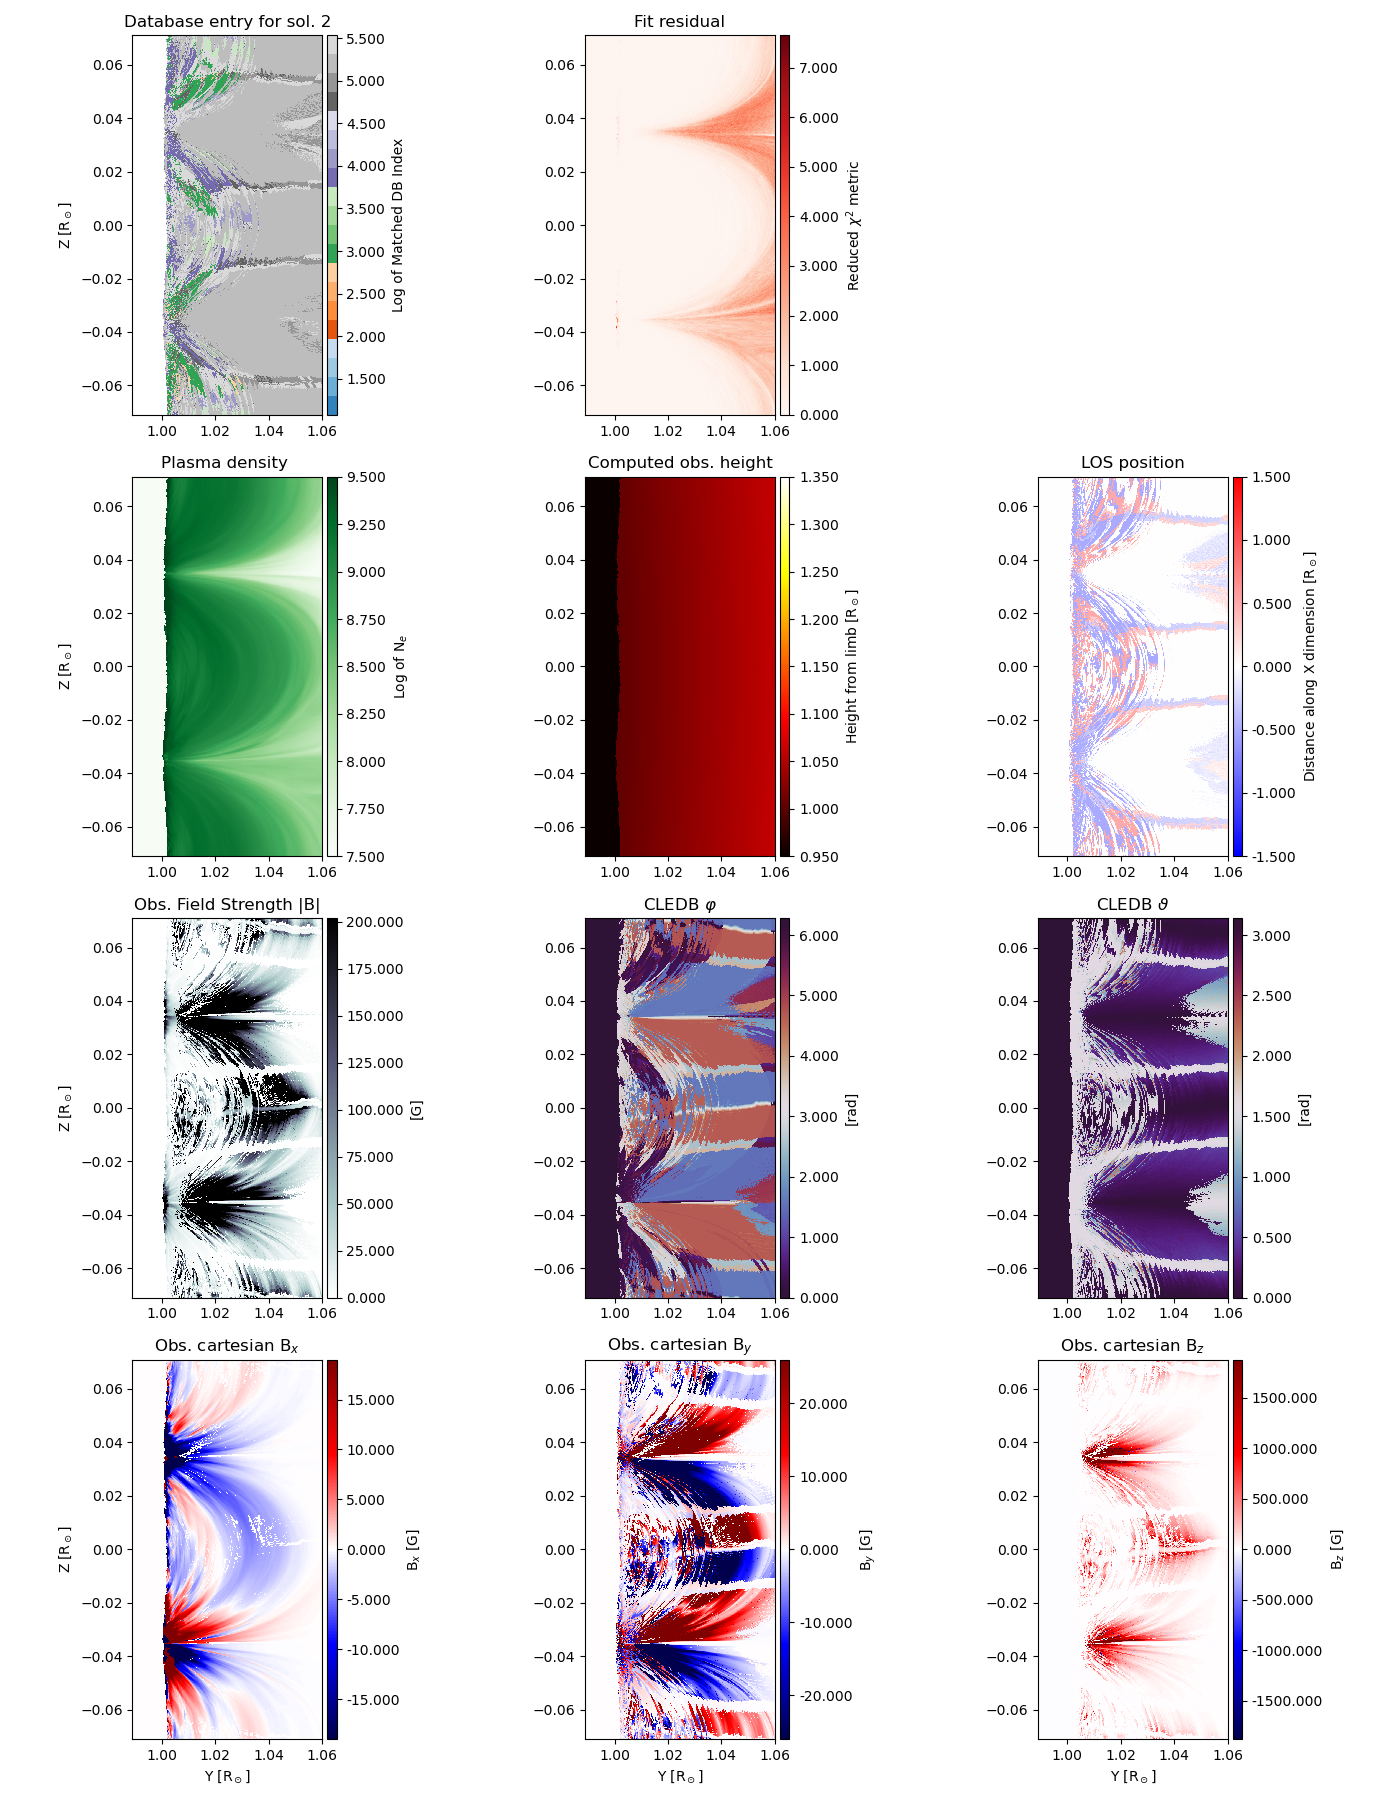

In [40]:
## Plot magnetic inversion

soln=2  ## selects the solution to plot < nsearch

fig, plots = plt.subplots(nrows=4, ncols=3, figsize=(14,18))

ab=plots[0,0].imshow(np.log10(invout[srx1:srx2,sry1:sry2,soln,0]),extent=rnge,cmap='tab20c',interpolation='none')
plots[0,0].set_title(f'Database entry for sol. {soln}')
colorbar(ab, title='Log of Matched DB Index')
plots[0,0].set_ylabel('Z [R$_\odot$]')

ab=plots[0,1].imshow(invout[srx1:srx2,sry1:sry2,soln,1],extent=rnge,cmap='Reds',interpolation='none')
plots[0,1].set_title('Fit residual')
colorbar(ab, title='Reduced $\chi^2$ metric')

plots[0, 2].axis('off') ###leave one empty panel

ab=plots[1,0].imshow(invout[srx1:srx2,sry1:sry2,soln,2],cmap='Greens',interpolation='none',extent=rnge,vmin=7.5,vmax=9.5)
plots[1,0].set_title('Plasma density ')
colorbar(ab, title='Log of N$_e$')
plots[1,0].set_ylabel('Z [R$_\odot$]')

ab=plots[1,1].imshow(invout[srx1:srx2,sry1:sry2,soln,3],extent=rnge,cmap='hot',interpolation='none',vmin=0.95,vmax=1.35)
plots[1,1].set_title('Computed obs. height')
colorbar(ab, title='Height from limb [R$_\odot$]')

ab=plots[1,2].imshow(invout[srx1:srx2,sry1:sry2,soln,4],extent=rnge,cmap='bwr',interpolation='none',vmin=-1.5,vmax=1.5)
plots[1,2].set_title('LOS position')
colorbar(ab, title='Distance along X dimension [R$_\odot$]')

mmscale=np.fix(np.abs(2*np.mean(invout[srx1:srx2,sry1:sry2,soln,5])))
ab=plots[2,0].imshow(invout[srx1:srx2,sry1:sry2,soln,5],extent=rnge,cmap='bone_r',interpolation='none',vmin=0,vmax=mmscale)
plots[2,0].set_title('Obs. Field Strength |B|')
colorbar(ab, title='[G]')
plots[2,0].set_ylabel('Z [R$_\odot$]')

ab=plots[2,1].imshow(invout[srx1:srx2,sry1:sry2,soln,6],extent=rnge,cmap='twilight_shifted',interpolation='none',vmin=0,vmax=6.28)
plots[2,1].set_title('CLEDB $\\varphi$')
colorbar(ab, title='[rad]')

ab=plots[2,2].imshow(invout[srx1:srx2,sry1:sry2,soln,7],extent=rnge,cmap='twilight_shifted',interpolation='none',vmin=0,vmax=3.14)
plots[2,2].set_title('CLEDB $\\vartheta$ ')
colorbar(ab, title='[rad]')


mmscale=np.fix(np.abs(20*np.mean(invout[srx1:srx2,sry1:sry2,soln,8])))
ab=plots[3,0].imshow(invout[srx1:srx2,sry1:sry2,soln,8],extent=rnge,cmap='seismic',interpolation='none',vmin=-mmscale,vmax=mmscale)
plots[3,0].set_title('Obs. cartesian B$_x$')
colorbar(ab, title='B$_x$ [G]')
plots[3,0].set_ylabel('Z [R$_\odot$]')
plots[3,0].set_xlabel('Y [R$_\odot$]')

mmscale=np.fix(np.abs(20*np.mean(invout[srx1:srx2,sry1:sry2,soln,9])))
ab=plots[3,1].imshow(invout[srx1:srx2,sry1:sry2,soln,9],extent=rnge,cmap='seismic',interpolation='none',vmin=-mmscale,vmax=mmscale)
plots[3,1].set_title('Obs. cartesian B$_y$')
colorbar(ab, title='B$_y$ [G]')
plots[3,1].set_xlabel('Y [R$_\odot$]')

mmscale=np.fix(np.abs(20*np.mean(invout[srx1:srx2,sry1:sry2,soln,10])))
ab=plots[3,2].imshow(invout[srx1:srx2,sry1:sry2,soln,10],extent=rnge,cmap='seismic',interpolation='none',vmin=-mmscale,vmax=mmscale)
plots[3,2].set_title('Obs. cartesian B$_z$')
colorbar(ab, title='B$_z$ [G]')
plots[3,2].set_xlabel('Y [R$_\odot$]')

plt.tight_layout()

### Save the putput plots
if not os.path.exists('./testrun_outputs'):              ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')
plt.savefig(f"./testrun_outputs/invout_2line__sol{soln}_{datestamp}.pdf")

In [31]:
##Print pixelwise inversion solution in a human readable way

np.set_printoptions(linewidth=200,suppress=True)   ## Suppress can be set to true to disable exponential notation.
xx=391      ## x pixel position
yy=555      ## y pixel position

# print("||  DB Index    ||    chi^2    ||  ne density ||  y (height) || x(LOS pos.) ||      B      ||    varphi   ||  vartheta   ||     Bx      ||      By     ||     Bz       ||") ###for supress=False
print("||  DB Index   ||    chi^2      || ne density ||  y (height)  || x(LOS pos.) ||      B      ||    varphi   ||   vartheta   ||     Bx     ||      By    ||     Bz       ||") ###for supress=True
print(invout1[xx,yy,:,:])

||  DB Index   ||    chi^2      || ne density ||  y (height)  || x(LOS pos.) ||      B      ||    varphi   ||   vartheta   ||     Bx     ||      By    ||     Bz       ||
[[173959.              0.028816        9.079           1.0273815       0.            150.23708         4.6076694       2.7576203      -5.882832      -55.97148      -139.29741   ]
 [174049.              0.02881622      9.079           1.0273815       0.            225.1255          4.642576        2.7576203      -5.882771      -84.128044     -208.73274   ]
 [174139.              0.02881705      9.079           1.0273815       0.            449.97888         4.6774826       2.7576203      -5.882798     -168.46233      -417.2132    ]
 [157759.              0.02883424      9.079           1.0273815      -0.05          150.23828         4.6076694       2.7576203      -5.8828793     -55.971928     -139.29852   ]
 [157849.              0.02883626      9.079           1.0273815      -0.05          225.12675         4.642576   

In [32]:
##Print pixelwise inversion solution in a human readable way

np.set_printoptions(linewidth=200,suppress=True)   ## Suppress can be set to true to disable exponential notation.
xx=391      ## x pixel position
yy=555      ## y pixel position

# print("||  DB Index    ||    chi^2    ||  ne density ||  y (height) || x(LOS pos.) ||      B      ||    varphi   ||  vartheta   ||     Bx      ||      By     ||     Bz       ||") ###for supress=False
print("||  DB Index       ||  chi^2      || ne density   ||  y (height)  || x(LOS pos.) ||      B      ||     varphi     ||   vartheta    ||      Bx     ||      By      ||     Bz     ||") ###for supress=True
print(invout[xx,yy,:,:])

||  DB Index       ||  chi^2      || ne density   ||  y (height)  || x(LOS pos.) ||      B      ||     varphi     ||   vartheta    ||      Bx     ||      By      ||     Bz     ||
[[174069.              0.02874689      9.079           1.0273815       0.            545.61426         4.6774826       0.31415927     -5.884162     -168.50137       518.91003   ]
 [174141.              0.02874689      9.079           1.0273815       0.            545.6147          4.6774826       2.8274333      -5.8841677    -168.50153      -518.9104    ]
 [173979.              0.02874694      9.079           1.0273815       0.            272.97195         4.642576        0.31415927     -5.884131      -84.1475        259.61176   ]
 [174051.              0.02874694      9.079           1.0273815       0.            272.97214         4.642576        2.8274333      -5.884136      -84.14757      -259.6119    ]
 [173889.              0.02874795      9.079           1.0273815       0.            182.16708         4.

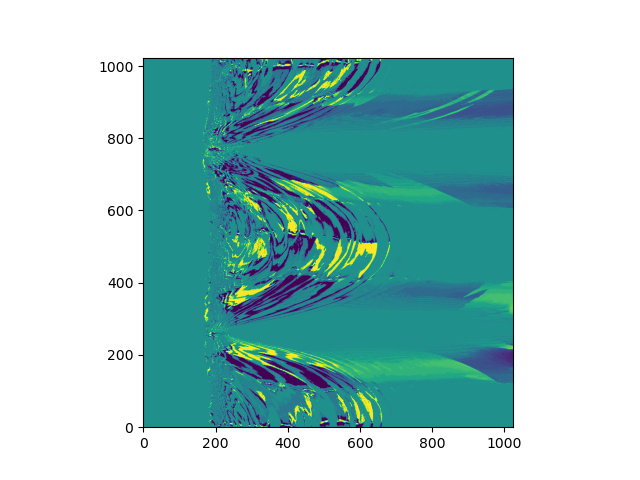

In [33]:
plt.figure()
plt.imshow(invout1[:,:,0,4],origin="lower")#,vmin=-15,vmax=15)

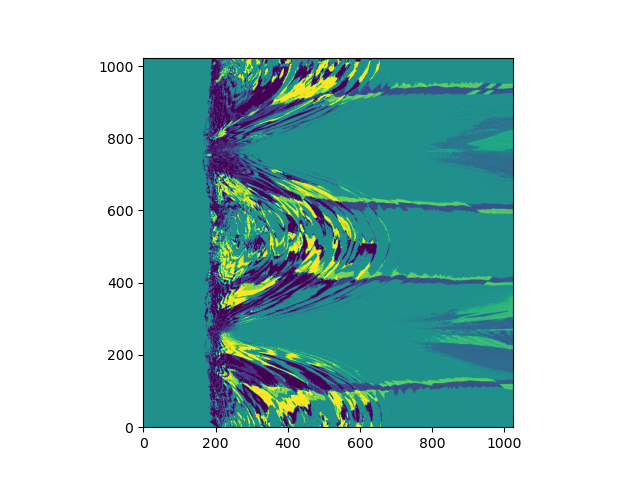

In [34]:
plt.figure()
plt.imshow(invout[:,:,0,4],origin="lower")

In [35]:
print(invout1[391,555,0,4],invout[391,555,0,4])
print(invout1[660,855,0,4],invout[660,855,0,4])

0.0 0.0
-0.15 0.0


In [36]:
##Print pixelwise inversion solution in a human readable way

np.set_printoptions(linewidth=200,suppress=True)   ## Suppress can be set to true to disable exponential notation.
xx=660      ## x pixel position
yy=855      ## y pixel position

# print("||  DB Index    ||    chi^2    ||  ne density ||  y (height) || x(LOS pos.) ||      B      ||    varphi   ||  vartheta   ||     Bx      ||      By     ||     Bz       ||") ###for supress=False
print("||  DB Index       ||  chi^2      || ne density   ||  y (height)  || x(LOS pos.) ||      B      ||     varphi     ||   vartheta    ||      Bx     ||      By      ||     Bz     ||") ###for supress=True
print(invout[xx,yy,:,:])

||  DB Index       ||  chi^2      || ne density   ||  y (height)  || x(LOS pos.) ||      B      ||     varphi     ||   vartheta    ||      Bx     ||      By      ||     Bz     ||
[[165970.              1.3435258       8.352           1.0481006       0.             12.872299        1.5358899       0.34906587      0.15364748      4.3999043      12.0960045 ]
 [166040.              1.3435259       8.352           1.0481006       0.             12.872304        1.5358899       2.792527        0.15364747      4.399904      -12.09601   ]
 [165880.              1.3436497       8.352           1.0481006       0.              6.440212        1.5009832       0.34906587      0.15365116      2.1973166       6.0518193 ]
 [165950.              1.3436497       8.352           1.0481006       0.              6.440214        1.5009832       2.792527        0.15365115      2.1973164      -6.051822  ]
 [165790.              1.3438619       8.352           1.0481006       0.              4.2979813       1.

In [37]:
##Print pixelwise inversion solution in a human readable way

np.set_printoptions(linewidth=200,suppress=True)   ## Suppress can be set to true to disable exponential notation.
xx=660      ## x pixel position
yy=855      ## y pixel position

# print("||  DB Index    ||    chi^2    ||  ne density ||  y (height) || x(LOS pos.) ||      B      ||    varphi   ||  vartheta   ||     Bx      ||      By     ||     Bz       ||") ###for supress=False
print("||  DB Index       ||  chi^2      || ne density   ||  y (height)  || x(LOS pos.) ||      B      ||     varphi     ||   vartheta    ||      Bx     ||      By      ||     Bz     ||") ###for supress=True
print(invout1[xx,yy,:,:])

||  DB Index       ||  chi^2      || ne density   ||  y (height)  || x(LOS pos.) ||      B      ||     varphi     ||   vartheta    ||      Bx     ||      By      ||     Bz     ||
[[115994.              1.3715354       8.352           1.0481006      -0.15            0.51678425      0.97738445      2.5830874       0.15313712      0.22703515     -0.43825793]
 [ 99794.              1.3723001       8.352           1.0481006      -0.2             0.5171232       0.97738445      2.5830874       0.15323757      0.22718407     -0.4385454 ]
 [132916.              1.3734165       8.352           1.0481006      -0.1             1.0544273       1.2566371       2.6529005       0.1529707       0.47079548     -0.931004  ]
 [116716.              1.3735156       8.352           1.0481006      -0.15            1.0548804       1.2566371       2.6529005       0.15303645      0.47099778     -0.93140405]
 [116355.              1.3735986       8.352           1.0481006      -0.15            0.69828403      1.

In [43]:
bphir= 1.5358899
bthetar1=0.34906587 
print(np.sin(bphir)*np.tan(bthetar1))
bthetar2=2.792527
print(np.sin(bphir)*np.tan(bthetar2))

print("###############################")

database_sel22= np.reshape(database[db_enc[660,855]],(np.int32(dbhdr[0][2]*dbhdr[0][3]*dbhdr[0][4]),8))
phib_obs      = -0.5*np.arctan2(database_sel22[165880,2],database_sel22[165880,1]) ## tan Phi_B = sin phi * tan theta
tphib_obs     = np.tan(phib_obs)                   ## here is tan Phi_B
tphib_obs_deg = np.tan(np.pi-phib_obs)                   ## and its degenerate branch

print(tphib_obs)
print(tphib_obs_deg)
print("###############################")
print( procinv.cledb_phys(166040,yobs[660,855],dobs[660,855],dbhdr,1))

print(sfound[660,855,:,:]/1130.2252)

0.3637485376279763
-0.3637482926982818
###############################
-0.363083650688524
0.3630836506885239
###############################
[ 8.352       1.0481006   0.          1.          1.5358899   2.792527    0.01193628  0.34181166 -0.9396927 ]
[[ 1.          0.00973587  0.00881739 -0.00000095  0.5955389   0.00019373  0.00017546 -0.00000058]
 [ 1.          0.00973588  0.00881739 -0.00000095  0.5955389   0.00019373  0.00017546 -0.00000058]
 [ 1.          0.00976122  0.0088195  -0.00000191  0.5955372   0.00019424  0.0001755  -0.00000116]
 [ 1.          0.00976123  0.0088195  -0.00000191  0.5955372   0.00019424  0.0001755  -0.00000116]
 [ 1.          0.00980339  0.00882281 -0.00000285  0.5955344   0.00019507  0.00017556 -0.00000174]
 [ 1.          0.0098034   0.00882281 -0.00000285  0.5955344   0.00019507  0.00017556 -0.00000174]
 [ 1.          0.00986225  0.00882701 -0.0000038   0.59553057  0.00019624  0.00017564 -0.00000231]
 [ 1.          0.00986226  0.00882701 -0.0000038   0.595

In [46]:
print(database_sel22[165880,:])
#print(database_sel22[174213,:])
#print(sfound[660,855,0,:]/1130.2252)
print(sobs_tot[660,855,:]/1130.2252)
print(sobs_totrot[660,855,:]/1130.2252)

sobs_tot_1pix1=np.sum(sobs_in[0][660,855,:,0])*head_in[0]["cdelt3"]
sobs_tot_1pix2=np.sum(sobs_in[1][660,855,:,0])*head_in[1]["cdelt3"]
print(sobs_tot_1pix2/sobs_tot_1pix1)

# sobs_tot_1pix1=sobs_in[0][660,855,51,0]
# sobs_tot_1pix2=sobs_in[1][660,855,51,0]
# print(sobs_tot_1pix2/sobs_tot_1pix1)

tbb=dict(np.load(params.lookuptb)) 
print(np.log10(prepinv.obs_dens_work_1pix(0,0,sobs_tot_1pix1,sobs_tot_1pix2,tbb,yobs[660,855])[2]))

[ 1.          0.01009087  0.00844034 -0.00000191  0.5955372   0.0002008   0.00016795 -0.00000116]
[ 1.          0.00405132  0.01635614 -0.00001227  0.5129307   0.00015729  0.00063126 -0.00000708]
[ 1.          0.00467291  0.01618952 -0.00001227  0.5129307   0.00018128  0.0006248  -0.00000708]
0.5147927423476143
8.356550090084552


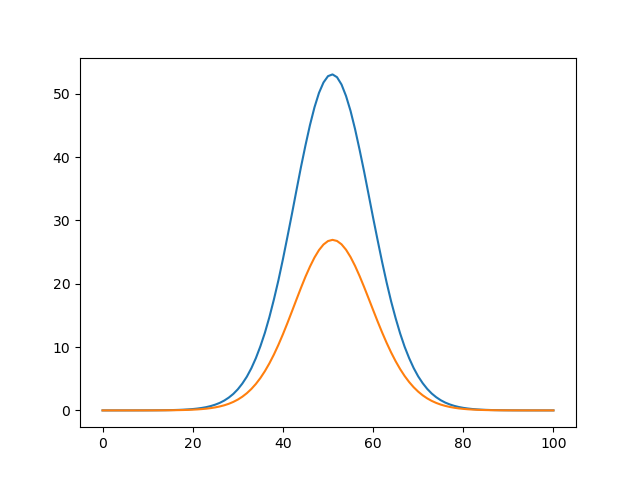

In [45]:
plt.figure()
plt.plot(sobs_in[0][660,855,:,0])
plt.plot(sobs_in[1][660,855,:,0])

In [47]:
print(yobs[660,855])

1.0481006


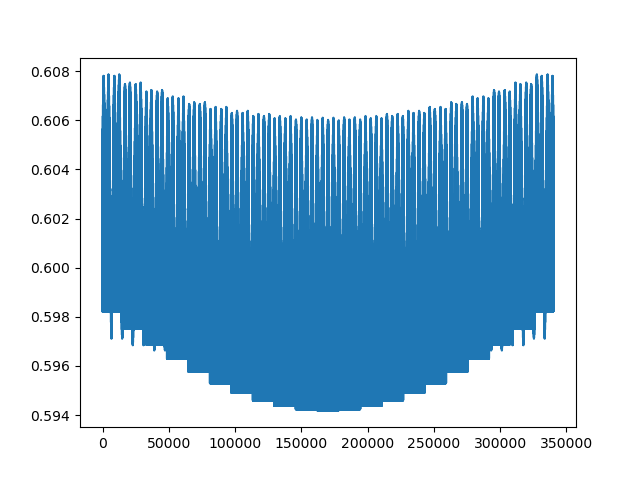

In [48]:
plt.figure()
plt.plot(database_sel22[:,4]/database_sel22[:,0])

In [49]:
print(dobs[660,855])
print(db_enc[660,855])
print(db_enc_f[660,855])
print(db_u[132])
print(dnames[1][572])

print(dnames[0][573])
print(dnames[0][571])
print(dnames[0][565])

8.352
132
572
572
/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1079/DB_h105_d835.npy
/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h105_d840.npy
/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h105_d830.npy
/data/arparaschiv/solar-coronal-inversion/CLEDB_BUILD/tmp1/fe-xiii_1074/DB_h105_d800.npy


In [102]:
print( np.where(db_enc_f == 565))
print(db_enc_f[168,942])

(array([168, 169, 169, 169, 170, 170, 170, 170, 170, 170, 171, 171, 171, 171, 171, 171, 171, 171, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 173, 173, 173, 173, 173, 173, 173, 173, 173,
       173, 173, 173, 173, 173, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175,
       175, 175, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177,
       177, 177, 177, 177, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179, 179,
       179, 179, 179, 179, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
       181, 18

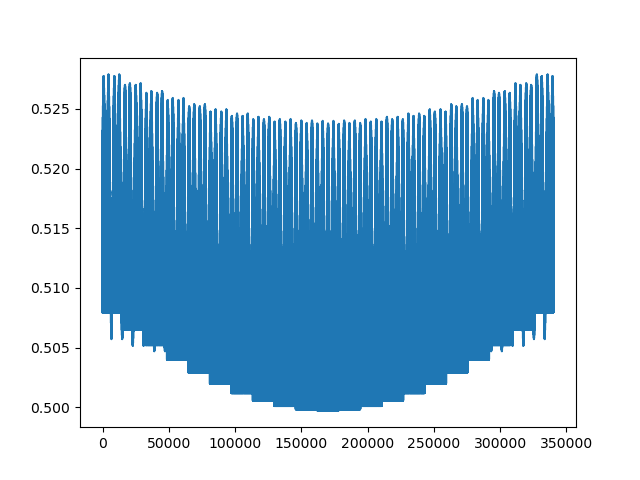

In [50]:
database_sel23= np.reshape(database[db_enc[168,942]],(np.int32(dbhdr[0][2]*dbhdr[0][3]*dbhdr[0][4]),8))
plt.figure()
plt.plot(database_sel23[:,4]/database_sel23[:,0])

In [51]:
importlib.reload(procinv)
print(database_sel23.shape)
gg2=procinv.cledb_physcle(340199,yobs[660,855],dobs[660,855],dbhdr)
print(gg2)
print(gg2[2]*180/np.pi)
print(gg2[3]*180/np.pi)

(340200, 8)
[8.352    0.5      6.248279 3.106686]
358.0000213459062
178.00000267657154
